In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [65]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [68]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [69]:
df.dropna(inplace = True)

In [70]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [71]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [72]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [73]:
df['Sex_male'] = df['Sex_male'].astype(int)

In [74]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,S,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,G6,S,0
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,S,0


In [75]:
import pandas as pd

# Assuming titanic_data is your DataFrame
df.drop(['Name'], axis=1, inplace=True)
df.drop(['Ticket'], axis=1, inplace=True)
df.drop(['Cabin'], axis=1, inplace=True)

In [80]:
df.drop(['Embarked'], axis=1, inplace=True)


In [81]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
1,2,1,1,38.0,1,0,71.2833,0
3,4,1,1,35.0,1,0,53.1000,0
6,7,0,1,54.0,0,0,51.8625,1
10,11,1,3,4.0,1,1,16.7000,0
11,12,1,1,58.0,0,0,26.5500,0


In [82]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('Survived',axis=1)
y = df['Survived']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [84]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier()

In [85]:
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7297297297297297


[Text(0.3194444444444444, 0.9615384615384616, 'x[6] <= 0.5\ngini = 0.432\nsamples = 146\nvalue = [46, 100]'),
 Text(0.08333333333333333, 0.8846153846153846, 'x[2] <= 3.0\ngini = 0.108\nsamples = 70\nvalue = [4, 66]'),
 Text(0.05555555555555555, 0.8076923076923077, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.1111111111111111, 0.8076923076923077, 'x[5] <= 11.488\ngini = 0.057\nsamples = 68\nvalue = [2, 66]'),
 Text(0.05555555555555555, 0.7307692307692307, 'x[0] <= 645.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.027777777777777776, 0.6538461538461539, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.08333333333333333, 0.6538461538461539, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.16666666666666666, 0.7307692307692307, 'x[5] <= 149.035\ngini = 0.03\nsamples = 65\nvalue = [1, 64]'),
 Text(0.1388888888888889, 0.6538461538461539, 'gini = 0.0\nsamples = 55\nvalue = [0, 55]'),
 Text(0.19444444444444445, 0.6538461538461539, 'x[5] <= 152.506\ngini = 0.18\nsamples =

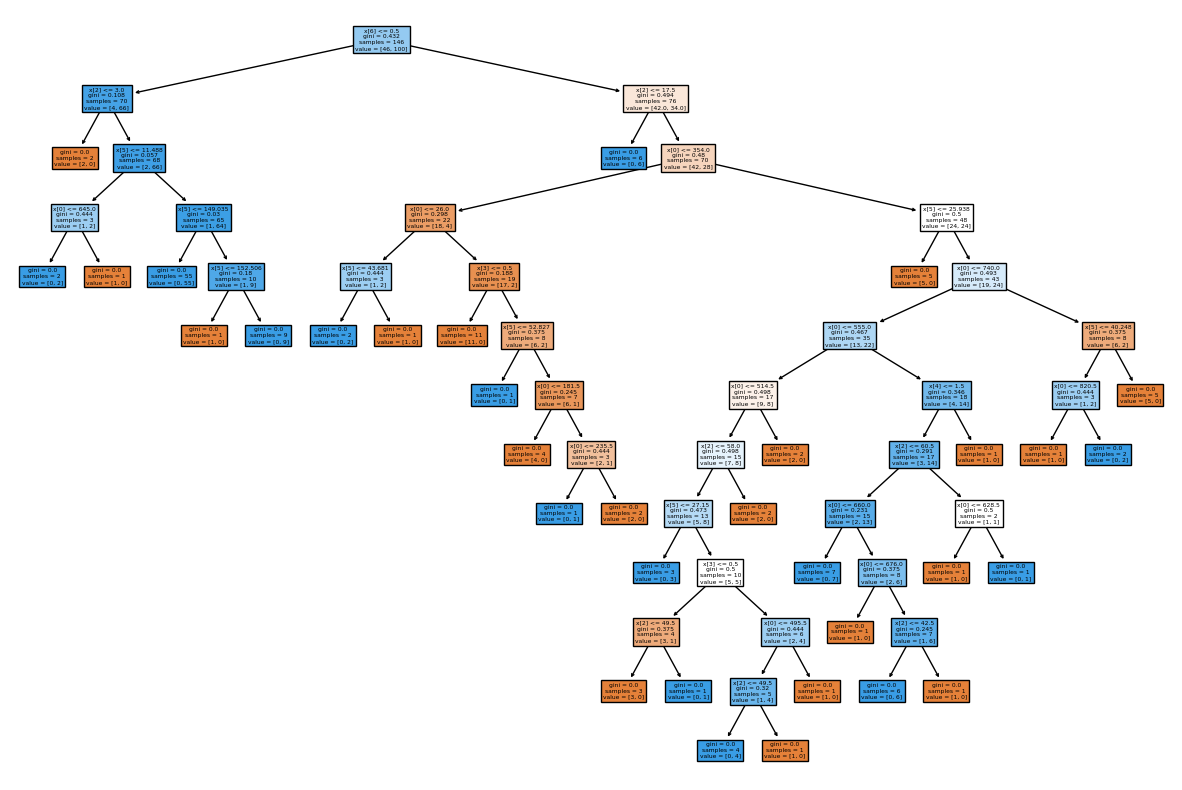

In [87]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(decision_tree,filled=True)

In [88]:
score = accuracy_score(y_pred,y_test)
print("Model Score: ",score)
cm = confusion_matrix(y_pred,y_test)
print(classification_report(y_pred,y_test))

Model Score:  0.7297297297297297
              precision    recall  f1-score   support

           0       0.64      0.64      0.64        14
           1       0.78      0.78      0.78        23

    accuracy                           0.73        37
   macro avg       0.71      0.71      0.71        37
weighted avg       0.73      0.73      0.73        37



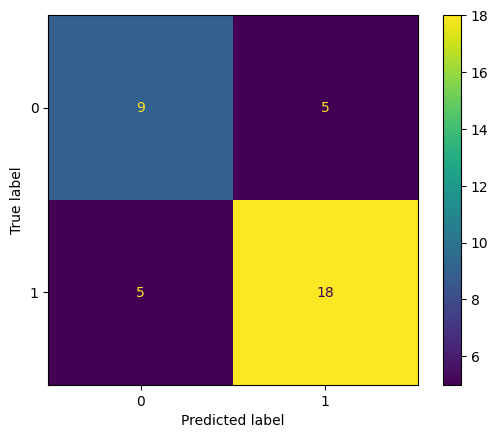

In [89]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [90]:
#Hyperparameter Tuning using the Grid SearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


In [91]:
decision_tree = DecisionTreeClassifier()
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [93]:
# Get the best hyperparameters
best_params = grid_search.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 10}

In [94]:
# Train the decision tree model with the best hyperparameters
best_decision_tree = DecisionTreeClassifier(**best_params)
best_decision_tree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10)

In [95]:
# Evaluate the model
y_pred = best_decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7567567567567568
